<a href="https://colab.research.google.com/github/doxenix/ZUM/blob/main/tic_tac_toe_projekt_ZUM_s24216.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INVISIBLE TIC-TAC-TOE
## Projekt zaliczeniowy z przedmiotu ZUM

***INVISIBLE TIC TACK TOE*** to aplikacja która umożliwia grę w kółko i krzyżyk za pomocą mowy. Nie trzeba używać do tego klawiatury i myszki (oczywiście przed trzeba uruchomić kod). Gra została stworzona dla dwóch graczy – jeden z nich to krzyżyk X, a drugi -  „kółko” O.

Podczas rozgrywki, uruchamiane są automatycznie polecenia głosowe, dzięki którym każdy z graczy wie co ma wykonać. Po usłyszeniu komunikatu należy powiedzieć odpowiednie wyrażenie. Przykładowo, aby zacząć grę należy powiedzieć – **zaczynamy grę**. Natomiast, aby wykonać odpowiedni ruch należy wymówić, np. „**wstaw krzyżyk na pole numer dwa**”. W przypadku wykonywania ruchu, logika została opracowana w ten sposób, że wychwytywany jest odpowiedni numer pola, co oznacza, że można to powiedzieć w różny sposób – np. „**krzyżyk na jeden**”.

Implementację gry umożliwił gotowy już model `facebook/wav2vec2-base-10k-voxpopuli-ft-pl`.

Nagrywanie głosu użytkownika jest możliwe dzięki gotowemu już API – MediaRecorder. Fragmentu kod odpowiadający za nagrywanie głosu został napisany w JavaScript.

Aby przejść do gry należy uruchomić poniższe bloki kodu i postępować z dalsza instrukcją.

**Dedykowanym środowiskiem uruchomieniowym jest Google Colab**

### Pola z numerami do gry zostały nadane w następujący sposób:

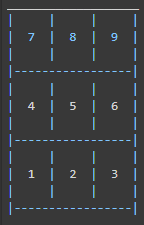

## W pierwszej kolejności, zainstalujmy potrzebne nam biblioteki:

In [ ]:
!pip install https://github.com/huggingface/transformers/archive/refs/heads/master.zip
!pip install gTTS

## Załadujmy teraz nasz gotowy model:

In [ ]:
from transformers import pipeline

def load_model(model_name="facebook/wav2vec2-base-10k-voxpopuli-ft-pl"):

    pipe = pipeline('automatic-speech-recognition', model_name)
    return pipe

load_model()

## Kolejnym krokiem będzie odpalenie tego bloku kodu.
### Umożliwi to nam wygenerowanie gotowych plików .wav które będą odtwarzane jako instrukcje do gry w formie dźwięku.

In [ ]:
from gtts import gTTS
from IPython.display import Audio, display
import time


class AudioSpeaker():
    def __init__(self, language='pl', autoplay=True):
        self.language = language
        self.format = format
        self.autoplay = autoplay

    def save_generated_voice(self, text, filename):
        tts = gTTS(text, lang=self.language)
        tts.save(filename)

    def play_voice(self, filename):
        play_voice = display(Audio(filename, autoplay=self.autoplay))
        time.sleep(3)


audio = AudioSpeaker()
audio.save_generated_voice(
    text='Czy chcesz zacząć grę?', filename='start_game.wav')

audio.save_generated_voice(
    text='Nie usłyszałem, spróbuj jeszcze raz', filename='say_it_again.wav')

audio.save_generated_voice(
    text='Wybierz pole od numeru jeden do dziewięć', filename='choice_1_9.wav')

audio.save_generated_voice(
    text='Chcesz zagrać jeszcze raz?', filename='play_again.wav')

audio.save_generated_voice(
    text='Grę zaczyna gracz krzyżyk', filename='game_start_player_X.wav')

audio.save_generated_voice(
    text='Teraz ruch gracza kółko', filename='O_turn.wav')

audio.save_generated_voice(
    text='Teraz ruch gracza krzyżyk', filename='X_turn.wav')

audio.save_generated_voice(text='Pole jest już zajęte',
                           filename='space_is_used.wav')

audio.save_generated_voice(
    text='Gratulacje, wygrał gracz krzyżyk!', filename='X_won.wav')

audio.save_generated_voice(
    text='Gratulacje, wygrał gracz kółko!', filename='O_won.wav')

## Uruchomienie tego bloku kodu stworzy metodę która umozliwi nam nagrywanie naszego głosu:

In [ ]:
from io import BytesIO
from base64 import b64decode
from google.colab import output
from IPython.display import Javascript

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""


def record(sec=3):
    print("Mów teraz...")
    display(Javascript(RECORD))
    sec += 1
    s = output.eval_js('record(%d)' % (sec*1000))
    print("Koniec Nagrywania !")
    b = b64decode(s.split(',')[1])
    return b  # byte stream


def say_and_predict():    
    audio = record(3)
    model = pipeline("automatic-speech-recognition",
                     "facebook/wav2vec2-base-10k-voxpopuli-ft-pl")
    predict = model(audio)
    prediction = list(predict.values())[0]
    print(prediction)
    return prediction


## I to tyle, jesteście gotowi do gry. Aby rozpocząć uruchom poniższy kod. 

Usłyszysz komunikat: **czy chcesz zaczać grę?**

Aby zacząć musisz powiedzieć: 

`zaczynamy grę`

Potem postępujcie zgodnie z instrukcjami i wstawiajcie X lub O na odpowiednie pola za pomocą Waszego głosu.

Gdy dana rozgrywka zostanie zakończona usłyszysz: 

**czy chcesz zagrać jeszcze raz?**

Powiedz wtedy `tak` lub `nie`

# UDANEJ ROZGRYWKI!

In [ ]:
def display_board(board):
    blankBoard = """
___________________
|     |     |     |
|  7  |  8  |  9  |
|     |     |     |
|-----------------|
|     |     |     |
|  4  |  5  |  6  |
|     |     |     |
|-----------------|
|     |     |     |
|  1  |  2  |  3  |
|     |     |     |
|-----------------|
"""

    for i in range(1, 10):
        if (board[i] == 'O' or board[i] == 'X'):
            blankBoard = blankBoard.replace(str(i), board[i])
        else:
            blankBoard = blankBoard.replace(str(i), ' ')
    print(blankBoard)


def start_game():
    read_to_play = False
    while not read_to_play:
        audio.play_voice(filename='start_game.wav')
        prediction = say_and_predict()
        if prediction in ('zaczynamy gre', 'zaczynamy grę'):
            player1 = 'X'
            player2 = 'O'
            audio.play_voice(filename='game_start_player_X.wav')
            return player1, player2
        else:
            audio.play_voice(filename='say_it_again.wav')


def place_marker(board, marker, position):
    board[position] = marker
    return board


def space_check(board, position):
    return board[position] == '#'


def full_board_check(board):
    return len([x for x in board if x == '#']) == 1


def win_check(board, mark):
    if board[1] == board[2] == board[3] == mark:
        return True
    if board[4] == board[5] == board[6] == mark:
        return True
    if board[7] == board[8] == board[9] == mark:
        return True
    if board[1] == board[4] == board[7] == mark:
        return True
    if board[2] == board[5] == board[8] == mark:
        return True
    if board[3] == board[6] == board[9] == mark:
        return True
    if board[1] == board[5] == board[9] == mark:
        return True
    if board[3] == board[5] == board[7] == mark:
        return True
    return False


def player_choice(board):
    valid_choice = False
    word_2_number = {
        "jeden": 1,
        "dwa": 2,
        "trzy": 3,
        "cztery": 4,
        "pięć": 5,
        "sześć": 6,
        "siedem": 7,
        "osiem": 8,
        "dziewięć": 9
    }

    while not valid_choice:
        audio.play_voice(filename='choice_1_9.wav')
        prediction = say_and_predict()
        predicted_words_list = prediction.split(' ')

        for word in predicted_words_list:
            if word in word_2_number.keys():
                choice = word_2_number[word]
                print(choice)
                if space_check(board, int(choice)):
                    return choice
                else:
                    audio.play_voice(filename='space_is_used.wav')
                    break

        audio.play_voice(filename='say_it_again.wav')
        time.sleep(3.5)


def replay():
    audio.play_voice(filename='play_again.wav')
    prediction = say_and_predict()

    if prediction == 'tak':
        return True
    if prediction == 'nie':
        return False


if __name__ == "__main__":
    print('Witaj w grze kółko i krzyżyk')
    i = 1
    # Choose your side
    players = start_game()
    # Empty board init
    board = ['#'] * 10
    while True:
        # Set the game up here
        game_on = full_board_check(board)
        while not game_on:
            # Player to choose where to put the mark
            position = player_choice(board)
            # Who's playin ?
            if i % 2 == 0:
                marker = players[1]
                audio.play_voice(filename='X_turn.wav')
            else:
                marker = players[0]
                audio.play_voice(filename='O_turn.wav')
            # Play !
            place_marker(board, marker, int(position))
            # Check the board
            display_board(board)
            i += 1
            if win_check(board, marker):
                if marker == 'X':
                    audio.play_voice(filename='X_won.wav')
                else:
                    audio.play_voice(filename='O_won.wav')

                break
            game_on = full_board_check(board)
        if not replay():
            break
        else:
            i = 1
            # Choose your side
            players = start_game()
            # Empty board init
            board = ['#'] * 10
